In [35]:
import torchvision
import torch
import tqdm
import matplotlib.pyplot as plt


GPU

In [36]:
# 使用 GPU
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

加载数据

In [37]:
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = torchvision.datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = torchvision.datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

卷积神经网络

In [38]:
class nn(torch.nn.Module):
    def __init__(self):
        super(nn, self).__init__()
        self.conv2d_1 = torch.nn.Conv2d(1, 6, 5, 1, padding=2, padding_mode="zeros")   # 卷积层1
        self.maxpool_1 = torch.nn.MaxPool2d(2,stride=2)   # 池化层1
        self.conv2d_2 = torch.nn.Conv2d(6, 16, 5, 1)   # 卷积层2
        self.maxpool_2 = torch.nn.MaxPool2d(2,stride=2)   # 池化层2
        self.flatten = torch.nn.Flatten()
        self.linear_1 = torch.nn.Linear(16 * 5 * 5, 120)   # 全连接层1
        self.linear_2 = torch.nn.Linear(120, 84)   # 全连接层2
        self.linear_3 = torch.nn.Linear(84, 10)   # 全连接层3

    def forward(self, img):
        img = self.conv2d_1(img)
        img = self.maxpool_1(img)
        img = self.conv2d_2(img)
        img = self.maxpool_2(img)
        img = self.flatten(img)
        img = self.linear_1(img)
        img = torch.nn.functional.sigmoid(self.linear_2(img))
        img = torch.nn.functional.sigmoid(self.linear_3(img))
        return img

训练

In [39]:
net = nn()
net = net.to(device=try_gpu())

net.train()

cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

loss_data = {
    "epoch" : [],
    "loss" : []
}

for epoch in tqdm.tqdm(range(15)):
    for images, labels in trainloader:
        images = images.to(device=try_gpu())
        labels = labels.to(device=try_gpu())
        y_predict = net(images)
        optimizer.zero_grad()
        loss = cost( y_predict, labels )
        loss_data["epoch"].append(epoch)
        loss_data["loss"].append(float(loss))
        loss.backward()
        optimizer.step()
        epoch = epoch + 1

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:16<03:45, 16.09s/it]

Loss

{'epoch': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

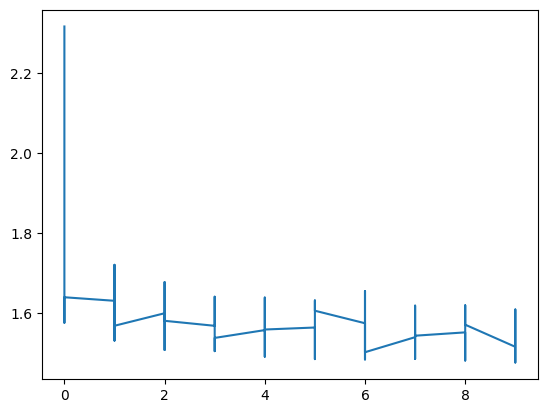

In [ ]:
print(loss_data)
plt.plot(loss_data["epoch"], loss_data["loss"])
plt.show()

测试模型

In [ ]:
net.eval()
yhat = []
epoch = 0
accuracy_sum = 0
for images, labels in testloader:
    images = images.to(device=try_gpu())
    labels = labels.to(device=try_gpu())
    y_predict = net(images)
    y_predict = torch.argmax(y_predict, dim = 1)
    accuracy = torch.eq(labels, y_predict).float().mean()
    accuracy_sum = accuracy_sum + accuracy
    epoch = epoch + 1
print("平均精准度：%f" % (accuracy_sum / epoch))

平均精准度：0.875995
